<a href="https://colab.research.google.com/github/romanfen/F21DL-G6/blob/main/Student_Performance_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import sys
sys.path
from platform import python_version
assert sys.version_info >= (3, 5)
print(python_version())

3.7.14


In [21]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
from pylab import rcParams
import seaborn as sb

In [22]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [23]:
# Load the data
def load_data():
    url = "https://raw.githubusercontent.com/romanfen/F21DL-G6/main/datasets/Maths.csv"
    return pd.read_csv(url)

students = load_data()
students_cols = list(students.columns)
print(students_cols)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [24]:
# Look at the data
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [25]:
# Describe the data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [26]:
# Analyze the data
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The average grade mark for the class sits at around 10 or 11, perfectly average which is to be expected.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb2cebc150>,
      dtype=object)

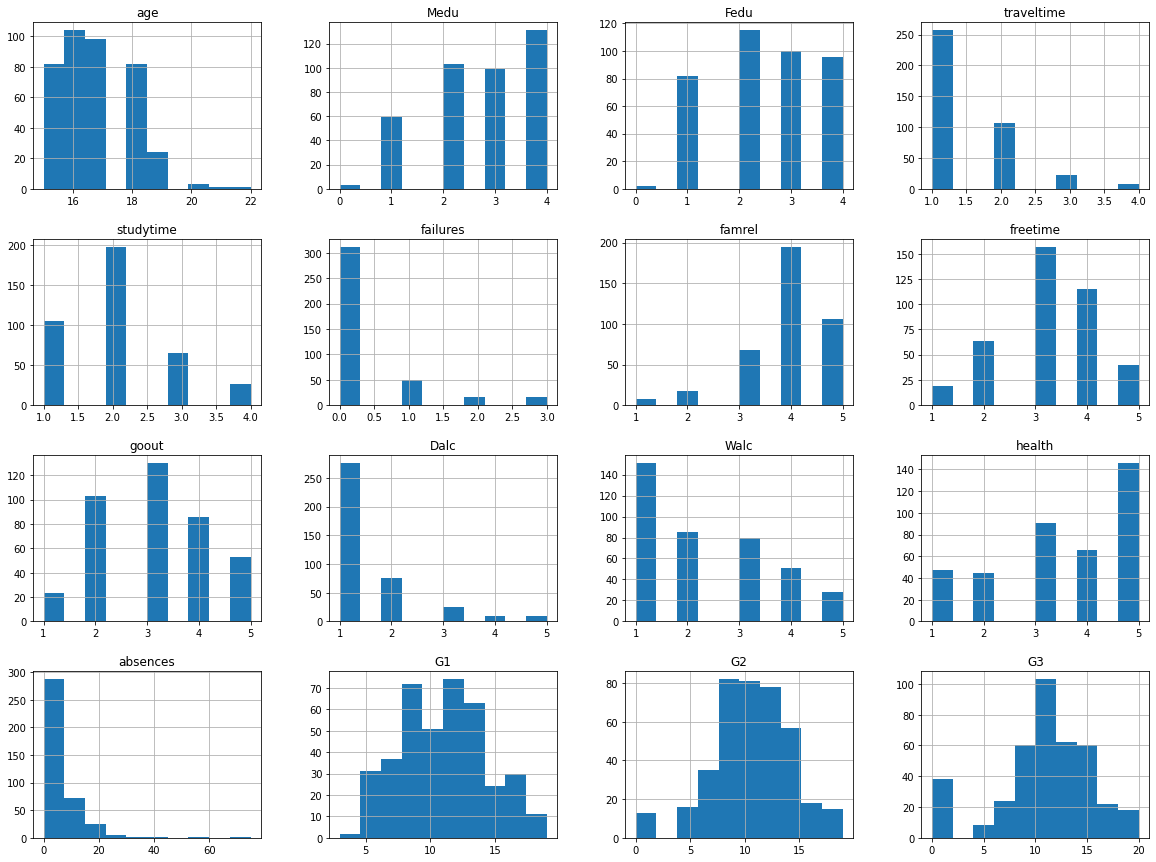

In [27]:
# Look at the data as histograms
students.hist(figsize=(20,15))

In [28]:
# Attribute correlation

corr_matrix = students.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [29]:
# Set test data aside
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(students, test_size=0.2, random_state=42)

test_set.head()

# Can also do stratified data split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

Data doesn't seem to be normalized properly, this is done below while also adjusting for categorical attributes

In [36]:
# Some of the data was nominal and binary but this switches them to numbers
"""
cat_enc = OneHotEncoder(sparse=False)

def convert_cat(data, column_name):
  col = data[[column_name]]
  col_enc = cat_enc.fit_transform(col)
  data[column_name] = col_enc

convert_cat(students, "school")
convert_cat(students, "sex")
convert_cat(students, "address")
convert_cat(students, "famsize")
convert_cat(students, "Pstatus")
convert_cat(students, "Mjob")
convert_cat(students, "Fjob")
convert_cat(students, "reason")
convert_cat(students, "guardian")
convert_cat(students, "schoolsup")
convert_cat(students, "famsup")
convert_cat(students, "paid")
convert_cat(students, "activities")
convert_cat(students, "nursery")
convert_cat(students, "higher")
convert_cat(students, "internet")
convert_cat(students, "romantic")
"""
cat_attributes = ["school","sex","address",
                  "famsize","Pstatus","Mjob",
                  "Fjob","reason","guardian",
                  "schoolsup","famsup","paid",
                  "activities","nursery","higher",
                  "internet","romantic"]

students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [31]:
# Scale the dataframe so we can use it
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

students_scaled = scaler.fit_transform(students)
students_scaled = pd.DataFrame(students_scaled, columns=students_cols)

students_scaled.head()
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n\nstudents_scaled = scaler.fit_transform(students)\nstudents_scaled = pd.DataFrame(students_scaled, columns=students_cols)\n\nstudents_scaled.head()\n'

In [32]:
# Correlate with new scaled data
"""
scaled_corr_matrix = students_scaled.corr()
scaled_corr_matrix['famsup'].sort_values(ascending=False)
"""

"\nscaled_corr_matrix = students_scaled.corr()\nscaled_corr_matrix['famsup'].sort_values(ascending=False)\n"

In [37]:
# remove all the non-numeric columns for now
"""
students_num = students


for attr in cat_attributes:
  students_num.drop([attr],axis=1, inplace=True)
"""

'\nstudents_num = students\n\n\nfor attr in cat_attributes:\n  students_num.drop([attr],axis=1, inplace=True)\n'

In [51]:
students_num = students.drop(cat_attributes, axis=1)

In [52]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

students_num_tr = num_pipeline.fit_transform(students_num)

In [53]:
students_num_tr

array([[ 1.02304645,  1.14385567,  1.36037064, ..., -1.78246688,
        -1.25479105, -0.96493392],
       [ 0.23837976, -1.60000865, -1.39997047, ..., -1.78246688,
        -1.52097927, -0.96493392],
       [-1.33095364, -1.60000865, -1.39997047, ..., -1.1791469 ,
        -0.72241461, -0.0907392 ],
       ...,
       [ 3.37704655, -1.60000865, -1.39997047, ..., -0.27416693,
        -0.72241461, -0.74638524],
       [ 1.02304645,  0.22923423, -0.47985677, ...,  0.02749306,
         0.34233827, -0.0907392 ],
       [ 1.80771315, -1.60000865, -1.39997047, ..., -0.87748691,
        -0.45622639, -0.30928788]])

In [54]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Combines the numerical pipeline with the encoding required for non-numeric values

num_attr = list(students_num)
type(num_attr)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),#  Apply the numerical transformation to the all numeric columns
        ("cat", OneHotEncoder(), cat_attributes), # Apply the One Hot Encoding to the all categorical columns
    ])

students_prepared = full_pipeline.fit_transform(students)

In [62]:
students_prepared

array([[ 1.02304645,  1.14385567,  1.36037064, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.23837976, -1.60000865, -1.39997047, ...,  1.        ,
         1.        ,  0.        ],
       [-1.33095364, -1.60000865, -1.39997047, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 3.37704655, -1.60000865, -1.39997047, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.02304645,  0.22923423, -0.47985677, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.80771315, -1.60000865, -1.39997047, ...,  1.        ,
         1.        ,  0.        ]])

In [63]:
students_prepared.shape

(395, 59)

In [ ]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit()